In [1]:
import requests
import pandas as pd

url = "http://127.0.0.1:8000/history/MSFT"
data = requests.get(url).json()

df = pd.DataFrame(data["records"])
df.head()


,date,open,high,low,close,volume
0,{'': '2024-12-27'},431.417523,432.032978,423.227936,427.377319,18117700
1,{'': '2024-12-30'},422.940090,424.419169,418.810548,421.719086,13158700
2,{'': '2024-12-31'},422.979743,423.605134,417.579576,418.413422,13246500
3,{'': '2025-01-02'},422.413951,422.950005,411.812165,415.514832,16896500
4,{'': '2025-01-03'},417.996512,420.924922,416.467811,420.249908,16662900


.\venv\Scripts\Activate
uvicorn main:app --reload

Convert Date to datetime & Sort

In [2]:
df["date"].iloc[0]


{'': '2024-12-27'}

In [3]:
df["date"] = df["date"].apply(lambda x: list(x.values())[0])
df["date"] = pd.to_datetime(df["date"])


In [4]:
df = df.sort_values("date").reset_index(drop=True)
df.head()


,date,open,high,low,close,volume
0,2024-12-27,431.417523,432.032978,423.227936,427.377319,18117700
1,2024-12-30,422.940090,424.419169,418.810548,421.719086,13158700
2,2024-12-31,422.979743,423.605134,417.579576,418.413422,13246500
3,2025-01-02,422.413951,422.950005,411.812165,415.514832,16896500
4,2025-01-03,417.996512,420.924922,416.467811,420.249908,16662900


Create Preprocessing & Feature Engineering

In [5]:
df["Return"]=df["close"].pct_change()
df["MA5"]=df["close"].rolling(5).mean()
df["MA10"]=df["close"].rolling(10).mean()
df["Volatility"]=df["Return"].rolling(5).std()
df["Target"]=df["close"].shift(-1) #next day closing price
df.head(10)

,date,open,high,low,close,volume,Return,MA5,MA10,Volatility,Target
0,2024-12-27,431.417523,432.032978,423.227936,427.377319,18117700,NaN,NaN,NaN,NaN,421.719086
1,2024-12-30,422.940090,424.419169,418.810548,421.719086,13158700,-0.013239,NaN,NaN,NaN,418.413422
2,2024-12-31,422.979743,423.605134,417.579576,418.413422,13246500,-0.007839,NaN,NaN,NaN,415.514832
3,2025-01-02,422.413951,422.950005,411.812165,415.514832,16896500,-0.006928,NaN,NaN,NaN,420.249908
4,2025-01-03,417.996512,420.924922,416.467811,420.249908,16662900,0.011396,420.654913,NaN,NaN,424.716949
5,2025-01-06,424.865845,431.139572,422.364309,424.716949,20573600,0.010629,420.122839,NaN,0.011406,419.277100
6,2025-01-07,425.858555,427.496466,417.718589,419.277100,18139100,-0.012808,419.634442,NaN,0.011294,421.451050
7,2025-01-08,420.359099,423.843406,418.453175,421.451050,15054600,0.005185,420.241968,NaN,0.010847,415.882141
8,2025-01-10,421.520541,421.599941,411.980897,415.882141,20201100,-0.013214,420.315430,NaN,0.012330,414.135040
9,2025-01-13,412.199307,415.435445,409.270928,414.135040,17604800,-0.004201,419.092456,419.873685,0.010661,412.626160


In [6]:
df_ml = df.dropna().copy()
df_ml.head()


,date,open,high,low,close,volume,Return,MA5,MA10,Volatility,Target
9,2025-01-13,412.199307,415.435445,409.270928,414.135040,17604800,-0.004201,419.092456,419.873685,0.010661,412.626160
10,2025-01-14,414.750473,416.666333,407.712395,412.626160,16935900,-0.003643,416.674298,418.398569,0.007615,423.188232
11,2025-01-15,416.060817,425.014755,415.207099,423.188232,19637800,0.025597,417.456525,418.545483,0.014737,421.470886
12,2025-01-16,425.560742,426.344935,421.282305,421.470886,15300000,-0.004058,417.460492,418.851230,0.014808,425.888306
13,2025-01-17,430.911250,431.298409,425.034618,425.888306,26197500,0.010481,419.461725,419.888577,0.013187,425.362183


Distribution of Numerical Features

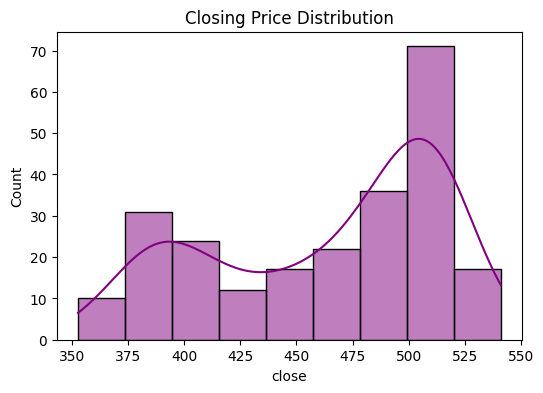

In [7]:
import matplotlib.pyplot as plt 
import seaborn as sns

plt.figure(figsize=(6,4))
sns.histplot(df_ml["close"],kde=True,color='purple')
plt.title('Closing Price Distribution')
plt.show()

Closing Price Over Time

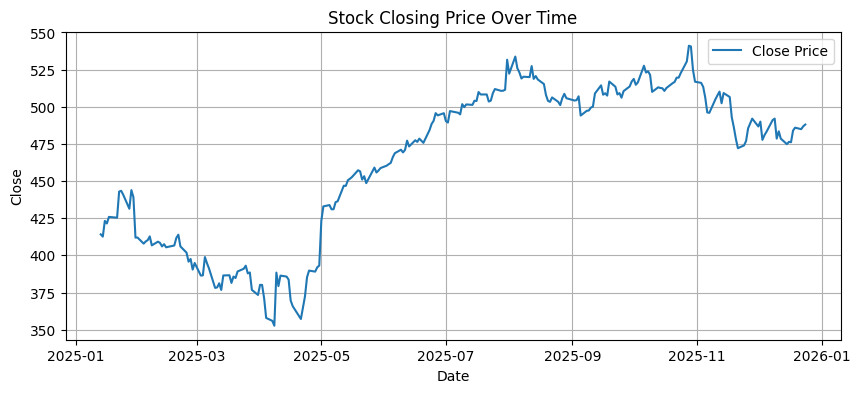

In [8]:
plt.figure(figsize=(10,4))
plt.plot(df_ml["date"],df_ml["close"],label="Close Price")
plt.title("Stock Closing Price Over Time")
plt.xlabel("Date")
plt.ylabel("Close")
plt.legend()
plt.grid(True)
plt.show()

Moving Averages

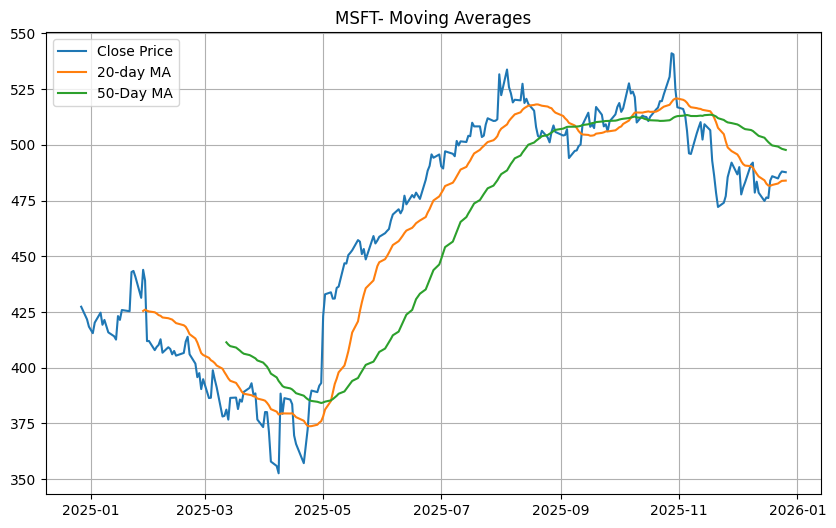

In [9]:
df["MA_20"]=df["close"].rolling(window=20).mean()
df["MA_50"]=df["close"].rolling(window=50).mean()

plt.figure(figsize=(10,6))
plt.plot(df["date"],df["close"],label='Close Price')
plt.plot(df["date"],df["MA_20"],label="20-day MA")
plt.plot(df["date"],df["MA_50"],label="50-Day MA")
plt.legend()
plt.title("MSFT- Moving Averages")
plt.grid()
plt.show()

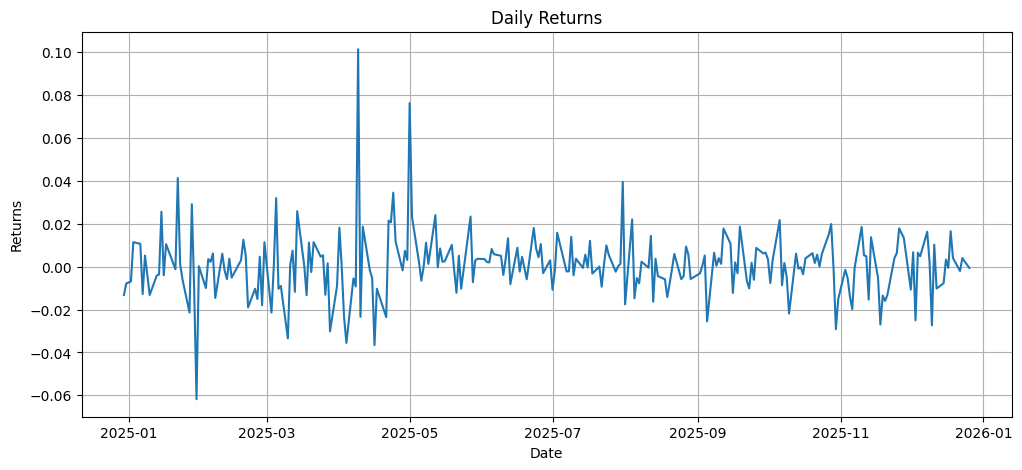

In [10]:
df["returns"]=df["close"].pct_change()

plt.figure(figsize=(12,5))
plt.plot(df["date"],df["returns"])
plt.title("Daily Returns")
plt.xlabel("Date")
plt.ylabel("Returns")
plt.grid()
plt.show()

In [11]:
df_ml = df.copy()

df_ml["MA_20"] = df_ml["close"].rolling(window=20).mean()
df_ml["MA_50"] = df_ml["close"].rolling(window=50).mean()
df_ml["returns"] = df_ml["close"].pct_change()


Train/Test Split

In [12]:
from sklearn.model_selection import train_test_split

X=df_ml[["open","high","low","close","volume","MA_20","MA_50","returns"]]
y=df_ml["Target"]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,shuffle=False)

In [13]:
from transformers import AutoTokenizer, AutoModelForCausalLM
import torch

model_name = "Qwen/Qwen2.5-1.5B-Instruct"

tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForCausalLM.from_pretrained(model_name, torch_dtype=torch.float32)

signals = df_ml.iloc[-1].to_dict()

prompt = f"""
You are an expert financial analyst.

Analyze the following stock signals:
{signals}

Give a structured 5-point expert analysis covering:
1. Why the stock moved today
2. Trend (MA5, MA10, MA20, MA50)
3. Volatility interpretation
4. Short-term prediction (bullish/bearish/neutral)
5. Risks and things investors should monitor
"""

inputs = tokenizer(prompt, return_tensors="pt")
outputs = model.generate(**inputs, max_new_tokens=1400, temperature=0.3)

print(tokenizer.decode(outputs[0], skip_special_tokens=True))


c:\Users\Harshita\LLM_Business_Report\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
`torch_dtype` is deprecated! Use `dtype` instead!



You are an expert financial analyst.

Analyze the following stock signals:
{'date': Timestamp('2025-12-26 00:00:00'), 'open': 486.7099914550781, 'high': 488.1199951171875, 'low': 485.9599914550781, 'close': 487.7099914550781, 'volume': 8822100, 'Return': -0.0006352148796615609, 'MA5': 486.6840026855469, 'MA10': 482.3260040283203, 'Volatility': 0.002759925744248426, 'Target': nan, 'MA_20': 483.9405014038086, 'MA_50': 497.70094787597657, 'returns': -0.0006352148796615609}

Give a structured 5-point expert analysis covering:
1. Why the stock moved today
2. Trend (MA5, MA10, MA20, MA50)
3. Volatility interpretation
4. Short-term prediction (bullish/bearish/neutral)
5. Risks and things investors should monitor
Certainly! Let's analyze the provided stock signal in detail:

### 1. Why the Stock Moved Today

The stock price closed at $487.7099914550781 on December 26, 2025, after opening at $486.7099914550781. The closing price is slightly higher than the opening price, indicating that the st

In [14]:
df_ml["predicted"] = df_ml["MA5"]

df_eval = df_ml.dropna().copy()

df_eval["actual_direction"] = (
    df_eval["Target"] > df_eval["close"]
).astype(int)

df_eval["pred_direction"] = (
    df_eval["predicted"] > df_eval["close"]
).astype(int)

direction_accuracy = (
    df_eval["actual_direction"] == df_eval["pred_direction"]
).mean()

direction_accuracy


np.float64(0.455)

In [15]:
llm_report = tokenizer.decode(
    outputs[0],
    skip_special_tokens=True
)

print(llm_report)



You are an expert financial analyst.

Analyze the following stock signals:
{'date': Timestamp('2025-12-26 00:00:00'), 'open': 486.7099914550781, 'high': 488.1199951171875, 'low': 485.9599914550781, 'close': 487.7099914550781, 'volume': 8822100, 'Return': -0.0006352148796615609, 'MA5': 486.6840026855469, 'MA10': 482.3260040283203, 'Volatility': 0.002759925744248426, 'Target': nan, 'MA_20': 483.9405014038086, 'MA_50': 497.70094787597657, 'returns': -0.0006352148796615609}

Give a structured 5-point expert analysis covering:
1. Why the stock moved today
2. Trend (MA5, MA10, MA20, MA50)
3. Volatility interpretation
4. Short-term prediction (bullish/bearish/neutral)
5. Risks and things investors should monitor
Certainly! Let's analyze the provided stock signal in detail:

### 1. Why the Stock Moved Today

The stock price closed at $487.7099914550781 on December 26, 2025, after opening at $486.7099914550781. The closing price is slightly higher than the opening price, indicating that the st

In [16]:
def llm_faithfulness_check(report, signals):
    checks = {
        "mentions_price": str(round(signals["close"], 2)) in report,
        "mentions_trend": any(
            kw in report.lower()
            for kw in ["bullish", "bearish", "neutral"]
        ),
        "mentions_volatility": "volatility" in report.lower(),
        "mentions_ma": "ma" in report.lower()
    }
    return checks


In [17]:
faithfulness = llm_faithfulness_check(llm_report, signals)
faithfulness


{'mentions_price': True,
 'mentions_trend': True,
 'mentions_volatility': True,
 'mentions_ma': True}

In [24]:
def decision_engine(signals, llm_report, direction_accuracy):
    score = 0

    # Quant rules
    if signals["MA5"] > signals["MA_20"]:
        score += 1
    if signals["Return"] > 0:
        score += 1
    if signals["Volatility"] < 0.02:
        score += 1
    if signals["MA_20"] > signals["MA_50"]:
        score += 1

    # LLM sentiment grounding
    report_lower = llm_report.lower()
    if "bullish" in report_lower:
        score += 1
    if "bearish" in report_lower:
        score -= 1

    # Confidence penalty
    if direction_accuracy < 0.5:
        score -= 1

    # Decision mapping
    if score >= 4:
        decision = "STRONG_BUY"
    elif score == 3:
        decision = "BUY"
    elif score == 2:
        decision = "HOLD"
    elif score == 1:
        decision = "SELL"
    else:
        decision = "STRONG_SELL"

    return decision, score


In [25]:
decision, score = decision_engine(signals, llm_report, direction_accuracy)



In [ ]:
print("\n" + "="*60)
print("⚙️ DECISION INTELLIGENCE OUTPUT")
print("="*60)

print(f"Decision Score      : {score}")
print(f"Final Decision      : {decision}")
print(f"Direction Accuracy  : {round(direction_accuracy * 100, 2)}%")



⚙️ DECISION INTELLIGENCE OUTPUT
Decision Score      : 1
Final Decision      : SELL
Direction Accuracy  : 45.5%


In [29]:
def confidence_engine(signals, llm_report, direction_accuracy, faithfulness):
    """
    Produces a confidence score (0–100%) for the final decision
    """

    confidence = 0.0

    # 1️⃣ Historical reliability (max 40%)
    confidence += direction_accuracy * 40

    # 2️⃣ Market stability (volatility-based)
    if signals["Volatility"] < 0.015:
        confidence += 20
    elif signals["Volatility"] < 0.03:
        confidence += 10

    # 3️⃣ Trend alignment
    if signals["MA5"] > signals["MA_20"]:
        confidence += 10
    if signals["MA_20"] > signals["MA_50"]:
        confidence += 10

    # 4️⃣ LLM faithfulness grounding (max 20%)
    faithfulness_score = sum(faithfulness.values()) / len(faithfulness)
    confidence += faithfulness_score * 20

    # 5️⃣ Clamp to 0–100
    confidence = min(round(confidence, 2), 100)

    return confidence


In [30]:
confidence_score = confidence_engine(
    signals=signals,
    llm_report=llm_report,
    direction_accuracy=direction_accuracy,
    faithfulness=faithfulness
)

print("="*60)
print("📊 CONFIDENCE & UNCERTAINTY OUTPUT")
print("="*60)
print(f"Confidence Score : {confidence_score}%")


📊 CONFIDENCE & UNCERTAINTY OUTPUT
Confidence Score : 68.2%


In [31]:
def position_sizing_engine(
    decision,
    confidence_score,
    signals,
    capital=100000  # hypothetical portfolio size
):
    """
    Converts decision + confidence into position size and risk controls
    """

    # Base allocation by decision type
    base_allocation = {
        "STRONG_BUY": 0.60,
        "BUY": 0.40,
        "HOLD": 0.20,
        "SELL": 0.10,
        "STRONG_SELL": 0.05
    }

    allocation_pct = base_allocation.get(decision, 0)

    # Confidence adjustment
    allocation_pct *= (confidence_score / 100)

    # Volatility-based risk dampening
    if signals["Volatility"] > 0.03:
        allocation_pct *= 0.5

    # Capital allocation
    allocated_capital = round(capital * allocation_pct, 2)

    # Risk controls
    stop_loss_pct = round(max(0.02, signals["Volatility"] * 2), 3)
    take_profit_pct = round(stop_loss_pct * 2, 3)

    return {
        "decision": decision,
        "confidence": f"{confidence_score}%",
        "allocation_pct": round(allocation_pct * 100, 2),
        "capital_allocated": allocated_capital,
        "stop_loss_pct": stop_loss_pct,
        "take_profit_pct": take_profit_pct
    }


In [36]:
final_decision = decision_engine(
    signals=signals,
    llm_report=llm_report,
    direction_accuracy=direction_accuracy
)

In [37]:
final_decision = decision_engine(
    signals=signals,
    llm_report=llm_report,
    direction_accuracy=direction_accuracy
)


In [38]:
position_output = position_sizing_engine(
    decision=final_decision,
    confidence_score=confidence_score,
    signals=signals
)

print("\n" + "="*65)
print("📌 POSITION SIZING & RISK OUTPUT (Layer 3)")
print("="*65)
for k, v in position_output.items():
    print(f"{k.replace('_',' ').title():<22}: {v}")



📌 POSITION SIZING & RISK OUTPUT (Layer 3)
Decision              : ('SELL', 1)
Confidence            : 68.2%
Allocation Pct        : 0.0
Capital Allocated     : 0.0
Stop Loss Pct         : 0.02
Take Profit Pct       : 0.04
